<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Escolaridade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')

In [21]:
data.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [22]:
data = data[['Município', 'Codigo_IBGE', 'Escolarização 6 a 14 anos']]
data.head()

,Município,Codigo_IBGE,Escolarização 6 a 14 anos
0,ADAMANTINA,3500105,"97,6"
1,ADOLFO,3500204,"98,6"
2,AGUAÍ,3500303,"95,8"
3,ÁGUAS DA PRATA,3500402,"98,8"
4,ÁGUAS DE LINDÓIA,3500501,"96,2"


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Município                  645 non-null    object
 1   Codigo_IBGE                645 non-null    int64 
 2   Escolarização 6 a 14 anos  645 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


##Convertendo o atributo de escolarização para ```float64```
Ao consultar o IBGE Cidades, observa-se que os índices de escolarização estão todos em porcentagem com, no máximo, uma casa decimal (ex.: Adamantina - 97,6%). Alguns municípios não possuem casa decimal (ex.: Paulicéia - "94%"). Com base nisso, aplica-se a função ```Esc_toFloat(x)```

In [24]:
def Esc_toFloat(x):
  if ',' in x:
    x = x.replace(',','')
    x = float(x)/10
  else:
    x = float(x)

  return x

In [25]:
data['Escolarização 6 a 14 anos'] = data['Escolarização 6 a 14 anos'].apply(Esc_toFloat)
data.head()

,Município,Codigo_IBGE,Escolarização 6 a 14 anos
0,ADAMANTINA,3500105,97.6
1,ADOLFO,3500204,98.6
2,AGUAÍ,3500303,95.8
3,ÁGUAS DA PRATA,3500402,98.8
4,ÁGUAS DE LINDÓIA,3500501,96.2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Município                  645 non-null    object 
 1   Codigo_IBGE                645 non-null    int64  
 2   Escolarização 6 a 14 anos  645 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ KB


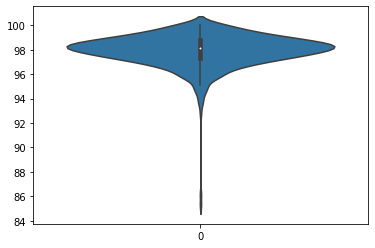

In [27]:
sns.violinplot(data=data['Escolarização 6 a 14 anos'])

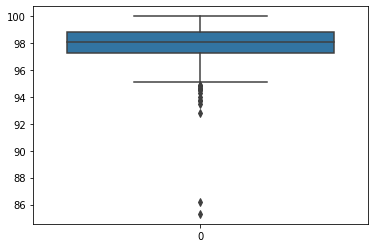

In [28]:
sns.boxplot(data=data['Escolarização 6 a 14 anos'])

In [29]:
data['Escolarização 6 a 14 anos'].describe()

count    645.000000
mean      97.937209
std        1.339827
min       85.300000
25%       97.300000
50%       98.100000
75%       98.800000
max      100.000000
Name: Escolarização 6 a 14 anos, dtype: float64

##Proposta de discretização
* "Outliers inferiores": 'Muito Baixa'
* Primeiro quartil: 'Baixa'
* Segundo quartil: 'Média'
* Terceiro quartil: 'Alta'
* Acima do terceiro quartil: 'Muito Alta'

In [33]:
# determinando o limite inferior
IQR = data['Escolarização 6 a 14 anos'].quantile(.75) - data['Escolarização 6 a 14 anos'].quantile(.25)
inf = data['Escolarização 6 a 14 anos'].quantile(.25) - 1.5 * IQR
print(f'%.1f' % inf)
# como não há "outliers superiores", não é preciso calcular o limite superior

95.0


In [35]:
bins = [data['Escolarização 6 a 14 anos'].min(),
        inf,
        data['Escolarização 6 a 14 anos'].quantile(.25),
        data['Escolarização 6 a 14 anos'].quantile(.50),
        data['Escolarização 6 a 14 anos'].quantile(.75),
        data['Escolarização 6 a 14 anos'].max()]
labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']
data['Classificação Escolarização'] = pd.cut(data['Escolarização 6 a 14 anos'], bins=bins, labels=labels, include_lowest=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Município                    645 non-null    object  
 1   Codigo_IBGE                  645 non-null    int64   
 2   Escolarização 6 a 14 anos    645 non-null    float64 
 3   Classificação Escolarização  645 non-null    category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 16.1+ KB


In [36]:
data.head()

,Município,Codigo_IBGE,Escolarização 6 a 14 anos,Classificação Escolarização
0,ADAMANTINA,3500105,97.6,Média
1,ADOLFO,3500204,98.6,Alta
2,AGUAÍ,3500303,95.8,Baixa
3,ÁGUAS DA PRATA,3500402,98.8,Alta
4,ÁGUAS DE LINDÓIA,3500501,96.2,Baixa


###Histograma da distribuição

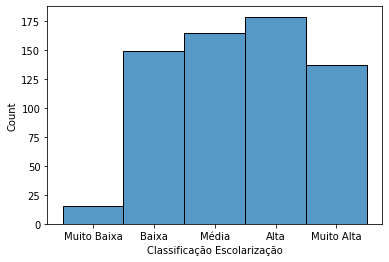

In [37]:
sns.histplot(data['Classificação Escolarização'])

In [38]:
data['Classificação Escolarização'].value_counts()

Alta           179
Média          165
Baixa          149
Muito Alta     137
Muito Baixa     15
Name: Classificação Escolarização, dtype: int64

Como há apenas 15 outliers, talvez seja mais interessante (tendo em mente a aplicação desta distribuição) unir as classificações "Muito Baixa" e "Baixa".